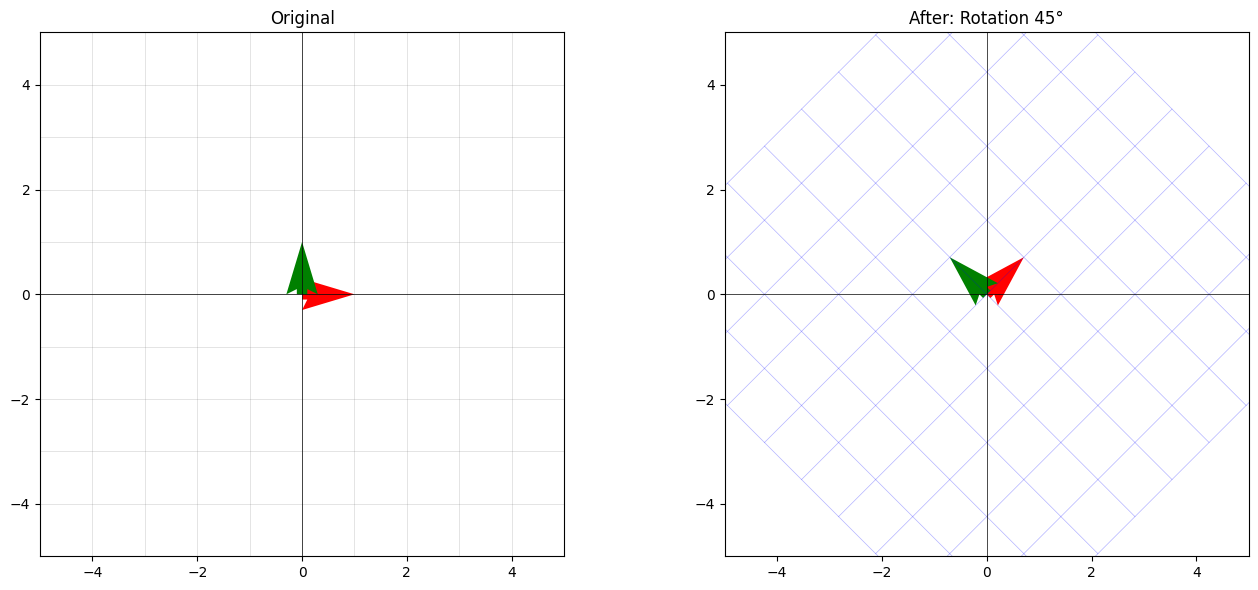

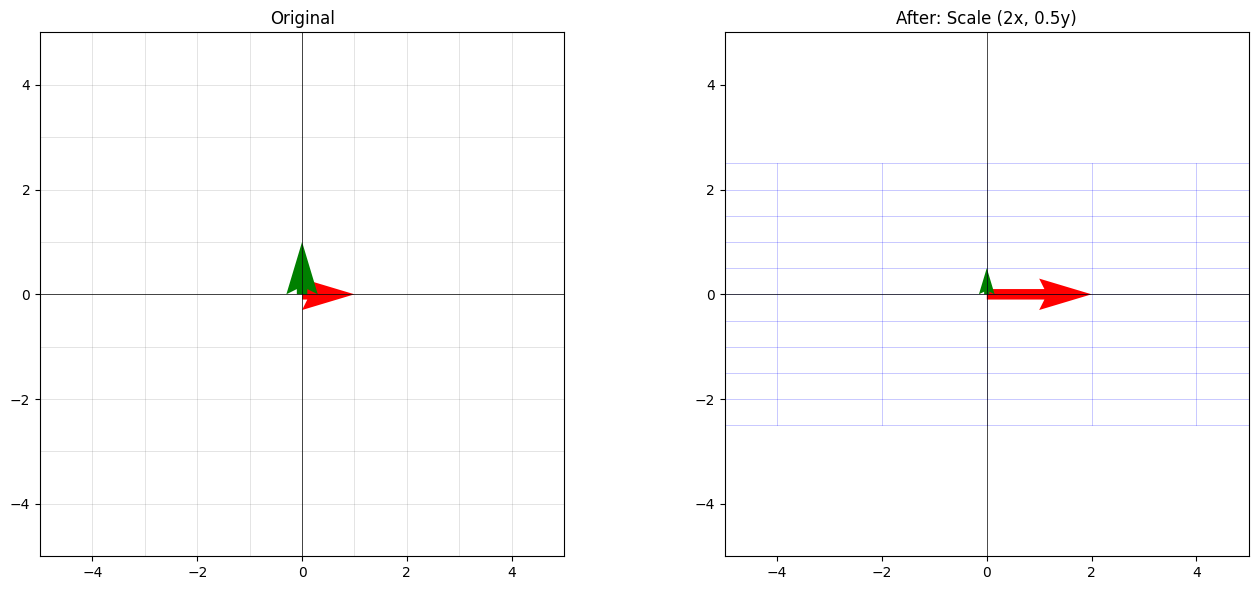

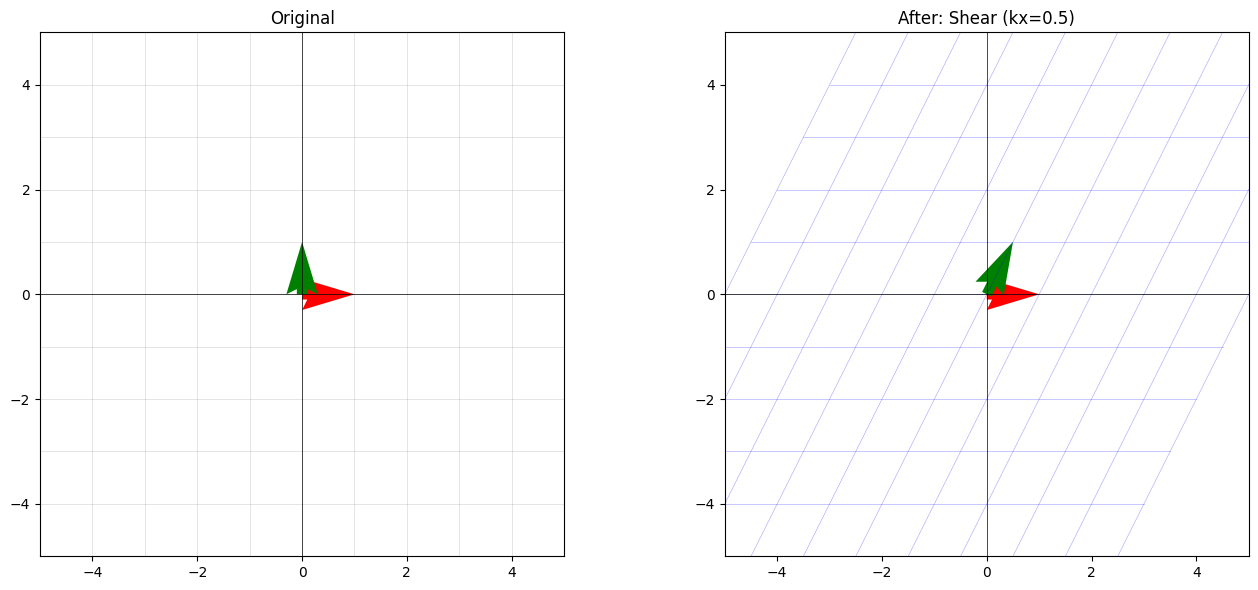

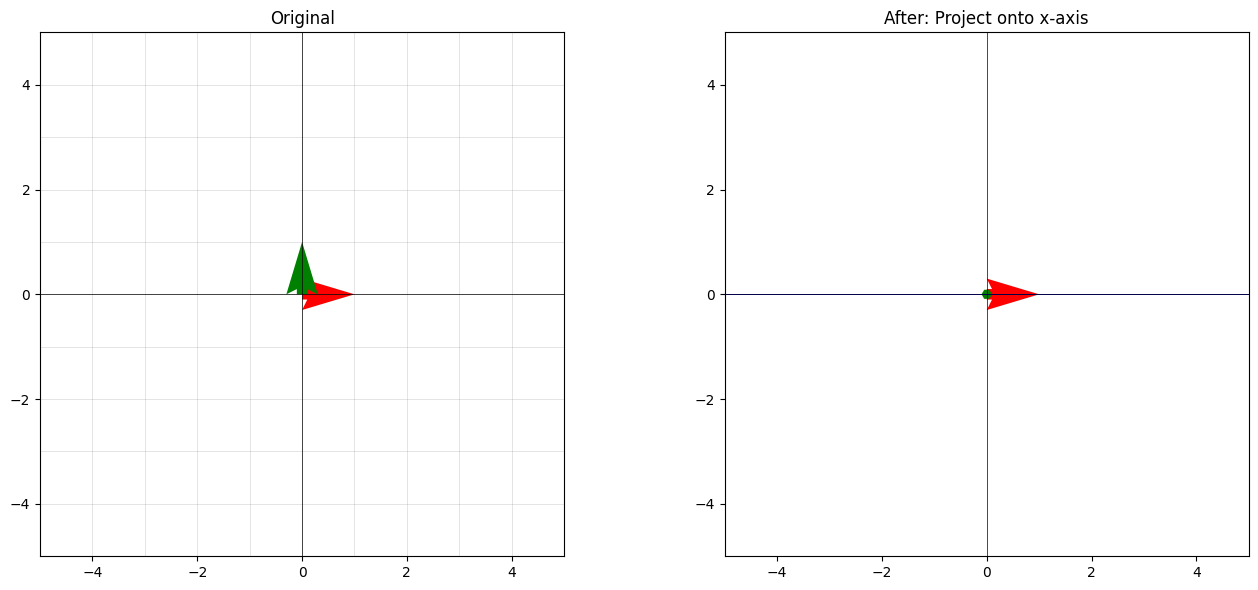

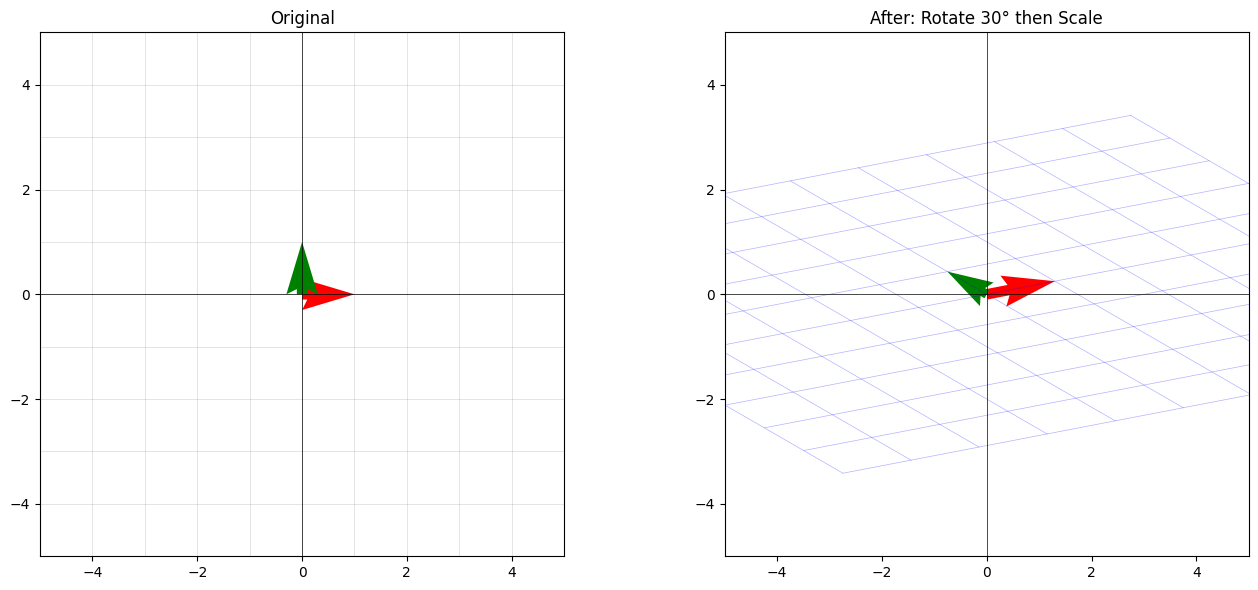

In [4]:
"""
Interactive 2D Transformation Visualizer
"""
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from src.matrix import Matrix, rotation_matrix, scaling_matrix, shear_matrix, projection_matrix, compose
from src.vector import Vector

def draw_grid(ax, transform: Matrix = None, color='blue', alpha=0.3):
    """
    Draw a grid of lines, optionally transformed.

    Args:
        ax: Matplotlib axes
        transform: Optional transformation matrix
        color: Line color
        alpha: Transparency
    """
    # Create grid lines
    for i in range(-5, 6):
        # Vertical lines
        points = [(i, y) for y in np.linspace(-5, 5, 50)]
        # Horizontal lines
        points_h = [(x, i) for x in np.linspace(-5, 5, 50)]

        if transform is not None:
            # Transform each point
            points = [transform @ Vector(list(p)) for p in points]
            points = [(v.components[0], v.components[1]) for v in points]

            points_h = [transform @ Vector(list(p)) for p in points_h]
            points_h = [(v.components[0], v.components[1]) for v in points_h]

        xs, ys = zip(*points)
        ax.plot(xs, ys, color=color, alpha=alpha, linewidth=0.5)

        xs, ys = zip(*points_h)
        ax.plot(xs, ys, color=color, alpha=alpha, linewidth=0.5)

def draw_basis_vectors(ax, transform: Matrix = None):
    """
    Draw the standard basis vectors, optionally transformed.

    Shows where [1,0] and [0,1] land.
    """
    e1 = Vector([1, 0])
    e2 = Vector([0, 1])

    if transform is not None:
        e1 = transform @ e1
        e2 = transform @ e2

    # Draw e1 (red)
    ax.quiver(0, 0, e1.components[0], e1.components[1],
              angles='xy', scale_units='xy', scale=1, color='red', width=0.02)

    # Draw e2 (green)
    ax.quiver(0, 0, e2.components[0], e2.components[1],
              angles='xy', scale_units='xy', scale=1, color='green', width=0.02)

def visualize_transformation(transform: Matrix, title: str = "Transformation"):
    """
    Visualize a transformation side-by-side.

    Shows:
    - Original grid and basis vectors
    - Transformed grid and basis vectors
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Original
    ax1.set_title("Original")
    draw_grid(ax1, None, 'gray')
    draw_basis_vectors(ax1, None)
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-5, 5)
    ax1.set_aspect('equal')
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.axvline(x=0, color='k', linewidth=0.5)

    # Transformed
    ax2.set_title(f"After: {title}")
    draw_grid(ax2, transform, 'blue')
    draw_basis_vectors(ax2, transform)
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    ax2.set_aspect('equal')
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.axvline(x=0, color='k', linewidth=0.5)

    plt.tight_layout()
    return fig

def explore_all_transformations():
    """Create visualizations for all basic transformations."""

    # Rotation
    fig = visualize_transformation(rotation_matrix(45), "Rotation 45°")
    fig.savefig("../figures/transform_rotation.png")

    # Scaling
    fig = visualize_transformation(scaling_matrix(2, 0.5), "Scale (2x, 0.5y)")
    fig.savefig("../figures/transform_scaling.png")

    # Shearing
    fig = visualize_transformation(shear_matrix(kx=0.5), "Shear (kx=0.5)")
    fig.savefig("../figures/transform_shear.png")

    # Projection
    fig = visualize_transformation(projection_matrix('x'), "Project onto x-axis")
    fig.savefig("../figures/transform_projection.png")

    # Composition
    R = rotation_matrix(30)
    S = scaling_matrix(1.5, 0.5)
    combined = compose(R, S)  # Rotate then scale
    fig = visualize_transformation(combined, "Rotate 30° then Scale")
    fig.savefig("../figures/transform_composed.png")

if __name__ == "__main__":
    explore_all_transformations()
    plt.show()